<a href="https://colab.research.google.com/github/deniseiras/trabalho_cap239_b/blob/master/RNN_To_COVID19_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network Example Applied to COVID-19


---


Authors: Luis Ricardo and Marcos Rodrigues

National Institute For Space Research

Applied Computing Ph.D. Program  

Date: June 2020

Useful links:  
> [Introduction Programing for Remote Sensing - SER-347 - Jupyter Notebook?](https://ser-347.github.io/ipython_jupyter/jupyter_introd.html)  
> [Welcome To Colaboratory (Colab)](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=C4HZx7Gndbrh)  
> [What is Google Colab?](https://www.tutorialspoint.com/google_colab/what_is_google_colab.htm)  
> [Colaboratory - Frequently Asked Questions](https://research.google.com/colaboratory/faq.html)  
> [Colab - External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP)

### Daily Cases of COVID in the Our World in Data:

Source: https://ourworldindata.org/covid-cases
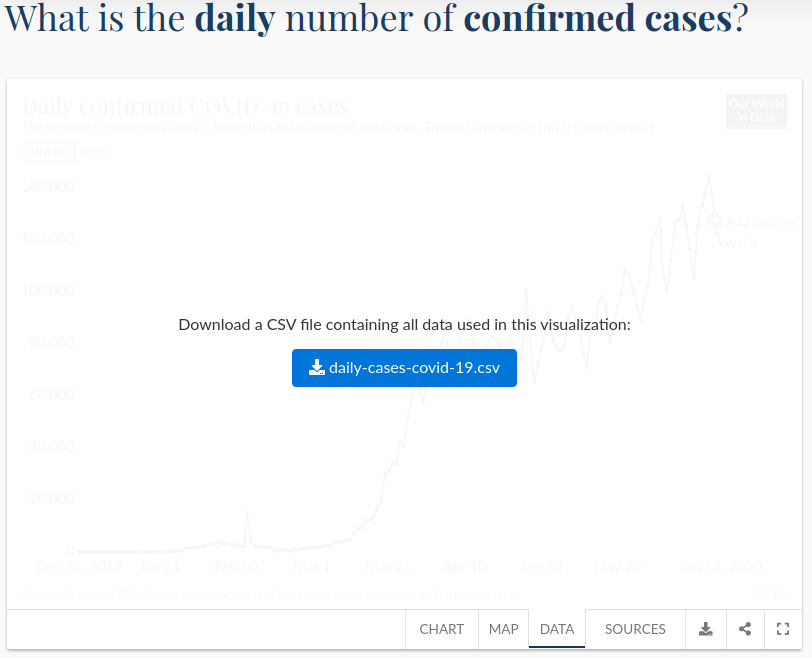

## Denis Tests


In [38]:
# Imports to read, manage and view data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
!lsb_release -d

#CPU: 
!lscpu |grep 'Model name'

#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

!lscpu | grep "L3 cache" 

#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at 2.3GHz
!lscpu | grep "MHz"


#hard disk space that we can use
print('Disk ', end="")
!df -h / | awk '{print $4}'

#RAM:
print('RAM Avail: ', end="")
!free -h --si | awk  '/Mem:/{print $2}'

#GPU:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Description:	Ubuntu 18.04.3 LTS
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
L3 cache:            46080K
CPU MHz:             2300.000
Disk Avail
34G
RAM Avail: 13G
Fri Jun 19 11:33:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|      

### Get data from Google Drive via PyDrive

Source: [3 Ways to Load CSV files into Colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [3]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [79]:
# arq covid até 25/5
link = 'https://drive.google.com/file/d/1eiMoDr1J2vMYmxSd4IgEc11sG6ReZZ7G' # The shareable link

id='1eiMoDr1J2vMYmxSd4IgEc11sG6ReZZ7G'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('daily-cases-covid-19.csv')
!rm -rf Number_Daily_Cases
!mkdir Number_Daily_Cases
!mv daily-cases-covid-19.csv ./Number_Daily_Cases

In [80]:
!ls ./Number_Daily_Cases/

daily-cases-covid-19.csv


In [81]:
serie_cases = pd.read_csv('./Number_Daily_Cases/daily-cases-covid-19.csv',header = None)

### Manipulando as Estruturas de Dados

In [76]:
serie_cases.head()

,0,1,2,3,4
0,NaN,Daily confirmed cases (cases),Entity,Code,Date
1,0.0,0.0,Brazil,BRA,2020-05-25
2,1.0,0.0,Brazil,BRA,2020-05-25
3,2.0,0.0,Brazil,BRA,2020-05-25
4,3.0,0.0,Brazil,BRA,2020-05-25


In [77]:
serie_cases.tail()

,0,1,2,3,4
3524,3523.0,15813.0,Brazil,BRA,2020-05-25
3525,3524.0,15813.0,Brazil,BRA,2020-05-25
3526,3525.0,15813.0,Brazil,BRA,2020-05-25
3527,3526.0,15813.0,Brazil,BRA,2020-05-25
3528,3527.0,15813.0,Brazil,BRA,2020-05-25


#### ANALISANDO UM PAIS

Series([], Name: 3, dtype: object)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]

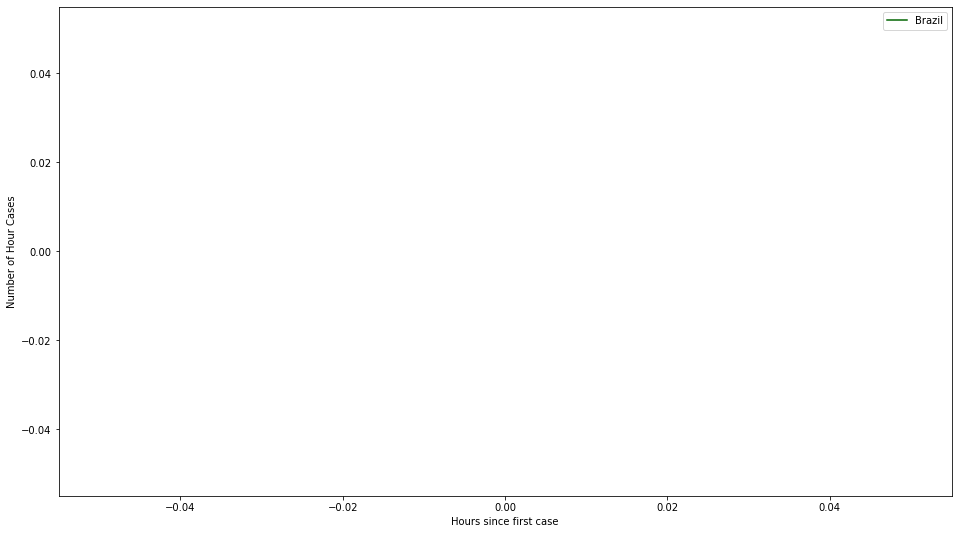

In [78]:
# country_list = ["Brazil", "Portugal", "Spain", "France", "Belgium", "United States", "Italy", "China", "South Korea"]
country_list = ["Brazil"]
# color_list = ['darkgreen', 'darkred', 'yellow', 'blue', 'black', 'red', 'violet', 'brown', 'darkorange']
color_list = ['darkgreen']

plt.close('all')
plt.figure(figsize=(16, 9))
for cty, color in zip(country_list, color_list):
    select_cases_pais = serie_cases[serie_cases[0] == cty]
    select_cases_pais = select_cases_pais[[0,2,3]]

    pais_cases = select_cases_pais.iloc[:,2]
    print(pais_cases.tail())
    pais_days = select_cases_pais.iloc[:,1]

    pais_cases = pais_cases.tolist()
    pais_cases = np.asarray(pais_cases)
    pais_cases = np.float64(pais_cases)
    plt.plot(pais_cases,'b', label=cty, color=color);
    plt.legend()
    plt.draw()

plt.xlabel('Hours since first case')
plt.ylabel('Number of Hour Cases')
plt.plot()

In [21]:
len(pais_cases)

147

In [56]:
def generate_values_in_serie(pais_cases, num_of_values, is_random=True, is_between_serie=True):
    num_of_values = num_of_values + 1
    # df_time = pd.DataFrame()
    arr_time = [] 
    column = 0
    for row_s in pais_cases.iteritems():
        # df_time = df_time.append(row.copy())
        row = float(row_s[1])
        arr_rand = []
        if is_random or row == 0:
            arr_rand = [row] * num_of_values
        else:
            if is_between_serie:
                lower = int(row - (row * 0.5))
                upper = int(row + (row * 0.5))
                print(upper)
                arr_rand = [random.randrange(start=lower, stop=upper) for x in range(num_of_values)]
            else:
                arr_rand = np.random.dirichlet(np.ones(num_of_values), size=1).flatten() * row

        arr_time = arr_time + arr_rand

        # for i in range(num_of_values):
        # df_new_row = pd.Series()
        # df_new_row = arr_rand[i]
        # df_time = df_time.append(df_new_row, ignore_index=True)

    return arr_time

,0,1,2,3
21596,Zimbabwe,ZWE,"May 21, 2020",2
21597,Zimbabwe,ZWE,"May 22, 2020",3
21598,Zimbabwe,ZWE,"May 23, 2020",5
21599,Zimbabwe,ZWE,"May 24, 2020",0
21600,Zimbabwe,ZWE,"May 25, 2020",0


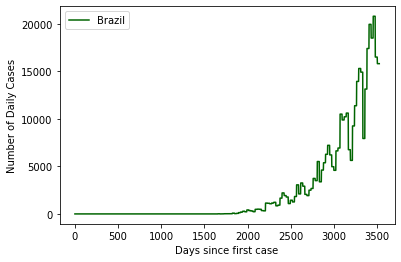

In [65]:
# Series com 24 horas para o Brasil

cty = 'Brazil'

select_cases_pais = serie_cases[serie_cases[0] == cty]
select_cases_pais = select_cases_pais[[0,2,3]]

pais_cases = select_cases_pais.iloc[:,2]
pais_days = select_cases_pais.iloc[:,1]

time_cases = generate_values_in_serie(pais_cases, 23, is_random=True, is_between_serie=True)
time_serie_cases = pd.DataFrame()
time_serie_cases['Daily confirmed cases (cases)'] = time_cases
time_serie_cases['Entity'] = 'Brazil'
time_serie_cases['Code'] = 'BRA'
time_serie_cases['Date'] = '2020-05-25'
time_serie_cases['Daily confirmed cases (cases)'] = time_cases

!mkdir Number_Hour_Cases
time_serie_cases.to_csv('./Number_Hour_Cases/hour-cases-covid-19.csv')

time_cases = np.asarray(time_cases)
time_cases = np.float64(time_cases)
plt.plot(time_cases,'b', label=cty, color=color);
plt.legend()
plt.draw()

plt.xlabel('Days since first case')
plt.ylabel('Number of Daily Cases')
plt.plot()

serie_cases.tail()

### Define functions to build model and prepare data to training

In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# univariate data preparation
import numpy as np
from numpy import array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM,Flatten
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from numpy import array 
from numpy import hstack 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

path = os.getcwd()

def organizar_dados(path_input,tipo_analise,pais):
    path = os.path.join(path_input,tipo_analise)    
    list_files_analise = os.listdir(path)
    list_files_analise.sort()
    serie_analise = pd.read_csv(os.path.join(path,list_files_analise[0]),header = None)
    select_analise = serie_analise[serie_analise[0] == pais]
    
    select_analise = select_analise[[0,2,3]]
    print(select_analise)
    print(os.path.join(path,list_files_analise[0]))
    
    return select_analise


#split a multivariate sequence into samples 

def split_sequences(sequences, n_steps_in, n_steps_out):
    '''
    Brownlee, J. (2018). Deep Learning for Time Series Forecasting: 
    Predict the Future with MLPs, CNNs and LSTMs in Python. 
    Machine Learning Mastery.
    '''
    X, y = list(), list() 
    for i in range(len(sequences)): 
        #find the end of this pattern 
        end_ix = i + n_steps_in 
        out_end_ix = end_ix + n_steps_out 
        #check if we are beyond the dataset 
        if out_end_ix > len(sequences): 
            break 
        #gather input and output parts of the pattern 
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix] 
        X.append(seq_x) 
        y.append(seq_y) 
    return X, y

def preparar_dados(dados_covid, n_dias_entrada, n_dias_saida):    
    # choose a number of time steps 
    # covert into input/output
    dados_covid = dados_covid.iloc[:,2]
    dados_covid = np.float64(dados_covid.tolist())
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = dados_covid.reshape(-1, 1)
    data = scaler.fit_transform(data)
    data = data.reshape(len(data),)
    
    #lista_covid = dados_covid.tolist()
    X, y = split_sequences(data, n_dias_entrada, n_dias_saida)
    
    inputarray = data[-n_dias_entrada:]
    inputarray = [float(i) for i in inputarray]
    inputarray = np.asarray(inputarray)
#    X = [float(i) for i in X]
#    y = [float(i) for i in y]
    X = np.float64(X)
    y = np.float64(y)
#    lista_covid =  [float(i) for i in lista_covid]
#    lista_covid = np.asarray(lista_covid)
#    lista_covid = np.float64(lista_covid)
    
    return data, X,y, inputarray,scaler


def definir_modelo_lstm_simples(modelo,n_dias_entrada, n_dias_saida):
    n_features = 1
    modelo.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_dias_entrada, n_features)))
    modelo.add(LSTM(200, activation='relu'))
    modelo.add(Dense(n_dias_saida))
    
    modelo.compile(optimizer='adam', loss='mse')
    return modelo

def treinamento(X,y,modelo,epocas,batch):
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # fit model
    history = modelo.fit(X, y, epochs=epocas,batch_size=batch)

    return history

def predict(modelo,inputarray,n_dias_entrada):
    n_features = 1
    x_input = inputarray
    x_input = x_input.reshape((1, n_dias_entrada, n_features))
    yhat = modelo.predict(x_input, verbose=0)
    
    y_future = np.asarray(yhat)
    y_future = yhat.ravel()
    y_future = np.float64(y_future)
    return y_future

def validacao(modelo,n_dias_entrada,inputarray):
    n_features = 1
    x_input = inputarray
    x_input = x_input.reshape((1, n_dias_entrada, n_features))
    yhat = modelo.predict(x_input, verbose=0)
    
    y_future = np.asarray(yhat)
    y_future = yhat.ravel()
    y_future = np.float64(y_future)
    
    return y_future

import pickle
import csv
   
def salvarmodelo(nome,modelo):
    #Salvando
    filename = nome+'.sav'
    pickle.dump(modelo, open(filename, 'wb'))
    

def salvardicionario(nome, history):
    #Salvando Dicionario
    w = csv.writer(open(nome+".csv", "w"))
    for key, val in history.items():
        w.writerow([key, val])    

def carregaModelo(nomeModelo):
    carrega_modelo = pickle.load(open(nomeModelo+'.sav', 'rb'))
    return carrega_modelo

Using TensorFlow backend.


In [72]:
'''
# =============================================================================
# Treinamento do modelo - 
# =============================================================================
'''

def gerarTreinamento_parametros(pais, folder, version,n_entradas,n_saidas):
    #Parametros: (path_input,tipo_analise,pais)
    daily_cases = organizar_dados(str(os.getcwd()), folder, pais)
    
    #Parametros: (dados_covid, n_dias_entrada, n_dias_saida) -- scaler - toback oringial data
    dados_covid, X,y, input_array, scaler = preparar_dados(daily_cases, n_entradas, n_saidas)
    
    ##Parametros: (modelo,n_dias_entrada, n_dias_saida)
    modelo = Sequential()
    modelo = definir_modelo_lstm_simples(modelo,n_entradas, n_saidas)
    
    #Parametros: (X,y,modelo,epocas,batch)
    history = treinamento(X,y,modelo,1,1)
    #cria dicionario
    history = history.history
    history.keys()
    
    #Salvando Dicionario
    salvardicionario("History_"+pais+"_"+version,history)
    salvarmodelo("Modelo_"+pais+"_"+version,modelo)

In [73]:

'''
# =============================================================================
# Treinamento dos modelos - paises
# =============================================================================
'''
# country_list = ["Brazil", "Portugal", "Spain", "France", "Belgium", "United States", "Italy", "China", "South Korea"]
# for cty in country_list:
cty = 'Brazil'
#modelo 1
#pontos de entrada
n_entrada = 24
#pontos de saida
n_saida = 12
gerarTreinamento_parametros(cty, 'Number_Hour_Cases', 'v1', n_entrada,n_saida)

#Parametros: pais,version,n_entradas,n_saidas    
# gerarTreinamento_parametros("Italy","v1",20,10)
# gerarTreinamento_parametros("Portugal","v2",10,5)
# gerarTreinamento_parametros("Portugal","v3",10,7)
# gerarTreinamento_parametros("Portugal","v4",10,10)
# gerarTreinamento_parametros("Portugal","v5",15,10)
# gerarTreinamento_parametros("Portugal","v6",20,10)

Empty DataFrame
Columns: [0, 2, 3]
Index: []
/content/Number_Daily_Cases/daily-cases-covid-19.csv


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: ignored

In [90]:
'''
# =============================================================================
# GERAR A VALIDAÇÃO DE SÉRIE INTEIRA AUTOMATICAMENTE
# =============================================================================
'''
def geraValidacao(pais,modelo,n_entrada,n_saida):
    daily_cases = organizar_dados(str(os.getcwd()),"Number_Daily_Cases",pais)
    dados_covid, X,y, input_array, scaler = preparar_dados(daily_cases, n_entrada, n_saida)
    
    print("len(dados_covid)", len(dados_covid))
    print("len(input_array)", len(input_array))
    #Carrega modelo já Treinado
    modelo = carregaModelo(modelo)
    
    list_pred = []
    for i in range(0, len(dados_covid), n_saida):
        input_array_test =  np.array(dados_covid[i:(i+n_entrada)])
        
        # BUG FIX - DENIS
        while len(input_array_test) < n_entrada:
           input_array_test = np.append(input_array_test,[0],axis = None)
        #if len(input_array_test) < n_entrada:
        #    input_array_test = np.append(input_array_test,[0],axis = None)
        
        y_predict_val_test = predict(modelo,input_array_test,n_entrada)
        list_pred.append(y_predict_val_test)
    
    plt.figure(figsize=(16, 9))
    concatenado = np.concatenate((list_pred[:]))
    true = dados_covid[n_entrada:len(concatenado)+n_entrada]
#    print(len(true))
#    print(len(concatenado))
    if len(true) < len(concatenado):
        print("entrou condi")
        lim = (len(concatenado) - len(true))
        concatenado = concatenado[0:len(concatenado) - lim]
        
    score_rmse = math.sqrt(mean_squared_error(concatenado, true))
    plt.plot(true,'b', alpha=0.5, label = 'True Values')
    plt.plot(concatenado,'r--', label = 'Predicted Values')
    
    plt.xlabel('Days Since First Case')
    plt.ylabel('Daily Confirmed Cases')
    plt.legend(loc ='upper right')
    plt.title('Prediction Score: %.4f RMSE' % (score_rmse))
    
    print("Prediction Score [RMSE]: ", score_rmse)
    return score_rmse


---------***-----Score Brazil ------***--------
           0     2        3
1     Brazil     0     0.00
2     Brazil     1     0.00
3     Brazil     2     0.00
4     Brazil     3     0.00
5     Brazil     4     0.00
...      ...   ...      ...
3524  Brazil  3523   816.32
3525  Brazil  3524   498.46
3526  Brazil  3525  1696.67
3527  Brazil  3526   406.52
3528  Brazil  3527    98.44

[3528 rows x 3 columns]
/content/Number_Daily_Cases/Brazil_hour_series_of_new_cases.csv
len(dados_covid) 3528
len(input_array) 240
entrou condi
Prediction Score [RMSE]:  0.04945216491383819


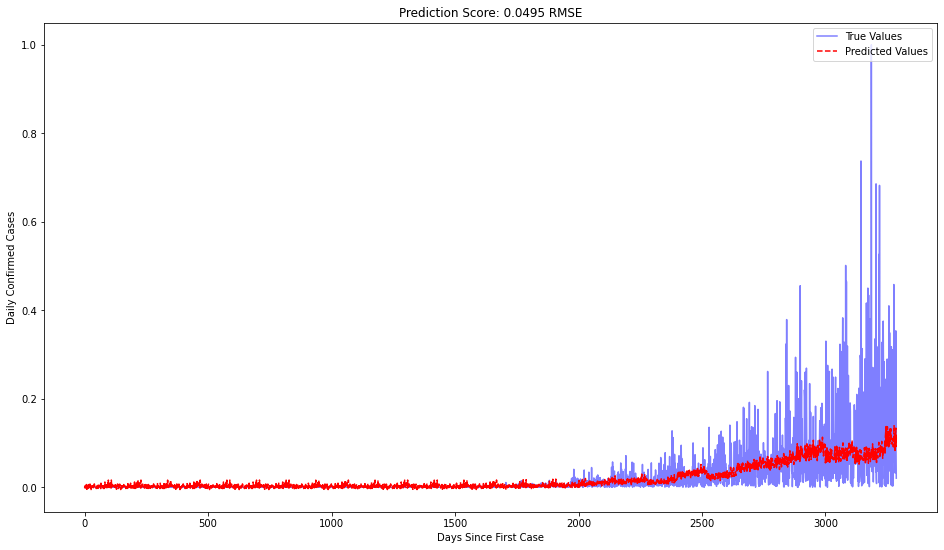

In [94]:
'''
Validação países
'''
#modelo 1
#pontos de entrada
n_entrada = 24
#pontos de saida
n_saida = 12

cty = 'Brazil'
# for cty in country_list:
print("---------***-----Score {} ------***--------".format(cty))
#Parametros: (pais,modelo,n_entrada,n_saida,t,lim_pred,lim_true):
score_italy_1 = geraValidacao(cty,"Modelo_{}_v1".format(cty), n_entrada, n_saida)



           0     2        3
1     Brazil     0     0.00
2     Brazil     1     0.00
3     Brazil     2     0.00
4     Brazil     3     0.00
5     Brazil     4     0.00
...      ...   ...      ...
3524  Brazil  3523   816.32
3525  Brazil  3524   498.46
3526  Brazil  3525  1696.67
3527  Brazil  3526   406.52
3528  Brazil  3527    98.44

[3528 rows x 3 columns]
/content/Number_Daily_Cases/Brazil_hour_series_of_new_cases.csv
240


Text(0.5, 1.0, 'Forecasting for Brazil COVID-19 Cases, Next 120 hours')

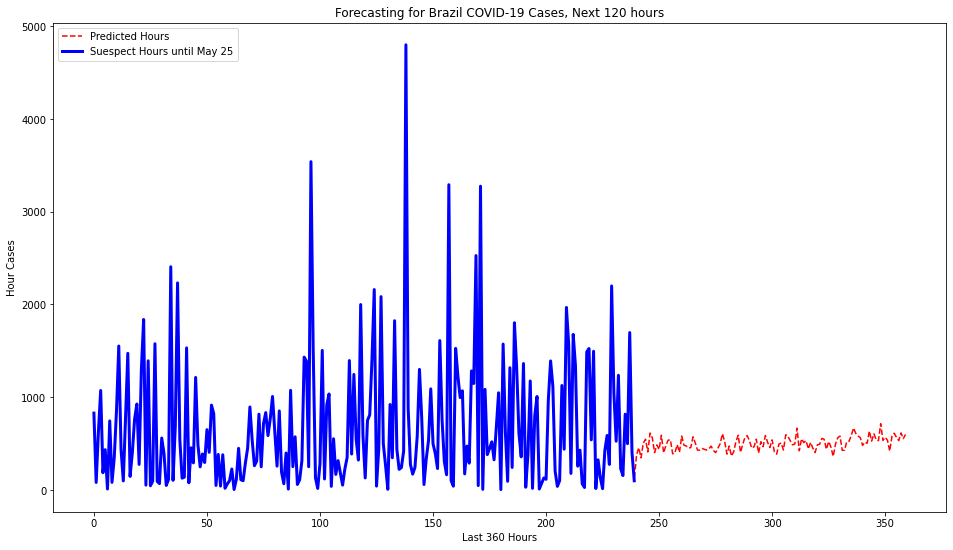

In [95]:
'''
MODELO ESCOLHIDO PARA A PREDIÇÃO DE PONTOS FUTUROS
'''
# for cty in country_list:
cty = 'Brazil'
horas_treino = 24
horas_prev = 12

3524
# plt.figure()
plt.close('all')
plt.figure(figsize=(16, 9))
#Carrega modelo já Treinado
modelo = carregaModelo('Modelo_{}_v1'.format(cty))

#Parametros: (dados_covid, n_dias_entrada, n_dias_saida) -- scaler - toback original data
daily_cases = organizar_dados(str(os.getcwd()),"Number_Daily_Cases",cty)
dados_covid, X,y, input_array, scaler = preparar_dados(daily_cases, horas_treino, horas_prev)
last_hour=len(dados_covid)
dados_covid = dados_covid[last_hour-horas_treino: last_hour]
print(len(dados_covid))

#input_array_2 =  np.array(dados_covid[last_hour-horas_treino:last_hour])
input_array_2 =  np.array(dados_covid[:])

y_predict_val = predict(modelo,input_array_2, horas_treino)
predicted_serie = np.concatenate((dados_covid, y_predict_val))
predicted_serie_transform = scaler.inverse_transform(predicted_serie.reshape(len(predicted_serie),1))
dados_covid_transform = scaler.inverse_transform(dados_covid.reshape(len(dados_covid),1))

plt.plot(predicted_serie_transform,'r--',label = 'Predicted Hours')
#plt.plot(dados_covid_transforma,'g',label = 'Updated Values')
plt.plot(dados_covid_transform,'b',label = 'Suespect Hours until May 25',linewidth=3.0)

plt.xlabel('Last {} Hours'.format(horas_treino + horas_prev))
plt.ylabel('Hour Cases')
plt.legend(loc ='upper left')
plt.title('Forecasting for {} COVID-19 Cases, Next {} hours'.format(cty, horas_prev))

## Web Scraping


---


### Painel COVID-19 - Voz das Comunidades
Fonte: https://painel.vozdascomunidades.com.br/

#### Painel de atualização de coronavírus nas favelas do Rio de Janeiro, feito pelo Voz das Comunidades. Os dados começaram a ser atualizados no dia 10/04/2020.

FONTE DAS INFORMAÇÕES SOBRE OS CASOS CONFIRMADOS E ÓBITOS CONFIRMADOS  
    - Prefeitura do Rio de Janeiro, Governo Estadual do Rio de Janeiro, Clínica da Família Zilda Arns, Clínica da Família Pavão-Pavãozinho e Cantagalo, Centro de Saúde Escola Germano Sinval Faria - ENSP, Clínica da família Victor Valla, Clínica da Família Maria do Socorro Silva e Souza, Clínica da Família Valter Felisbino de Souza, Unidade de Saúde da Familia João Candido, Clínica da Família Anthídio Dias da Silveira, Clínica da Família Rinaldo De Lamare, Cms Dr Albert Sabin e Comitê SOS Providência

FONTE DAS INFORMAÇÕES SOBRE OS RECUPERADOS   
    - Prefeitura do Rio de Janeiro


In [ ]:
# General Imports:
import re
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [ ]:
# Imports and Functions used for Web Scrapping and save data
import requests
from bs4 import BeautifulSoup, NavigableString
import socket
import ast #to eval python expression from strings

#https://docs.python.org/3/howto/urllib2.html
# timeout in seconds
timeout = 10
socket.setdefaulttimeout(timeout)

#----------------------------------
# Functions
#----------------------------------

#About pickle - https://stackoverflow.com/a/19201448
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def html2accent(textcontent):
    
    htmlcodes = ['&ccedil', '&Ccedil', '\u00e9','\u00ea','\u00e3']
    funnychars = ['ç','Ç','é','ê','ã']
    
    for i,pathern in enumerate(htmlcodes):
        textcontent = re.sub(pathern, funnychars[i], textcontent)    
    
    return textcontent


If the access was successful: <Response [200]>
<Response [200]> 


Id: 0 Tag: 

Id: 1 Tag: 

Id: 2 Tag: 

Id: 3 Tag: var acumulados = {"datas":["22\/03","23\/03","24\/03","25\/04","26\/03","27\/03","28\/03","29\/03","30\/03","31\/03","01\/04","02\/04","03\/04","04\/04","05\/04","06\/04","07\/04","08\/04","09\/04","10\/04","11\/04","12\/04","13\/04","14\/04","15\/04","16\/04","17\/04","18\/04","19\/04","20\/04","21\/04","22\/04","23\/04","24\/04","25\/04","26\/04","27\/04","28\/04","29\/04","30\/04","01\/05","02\/05","03\/05","04\/05","05\/05","06\/05","07\/05","08\/05","09\/05","10\/05","11\/05","12\/05","13\/05","14\/05","15\/05","16\/05","17\/05","18\/05","19\/05","20\/05","21\/05","22\/05","23\/05","24\/05","25\/05","26\/05","27\/05","28\/05","29\/05","30\/05","31\/05","01\/06","02\/06","03\/06","04\/06","05\/06","07\/06","08\/06","09\/06","10\/06","11\/06","12\/06","13\/06","14\/06","15\/06","16\/06"],"confirmados":[1,1,1,1,1,4,4,4,4,4,6,6,7,10,16,16,21,32,37,51,52,63,69,71,75,77,7

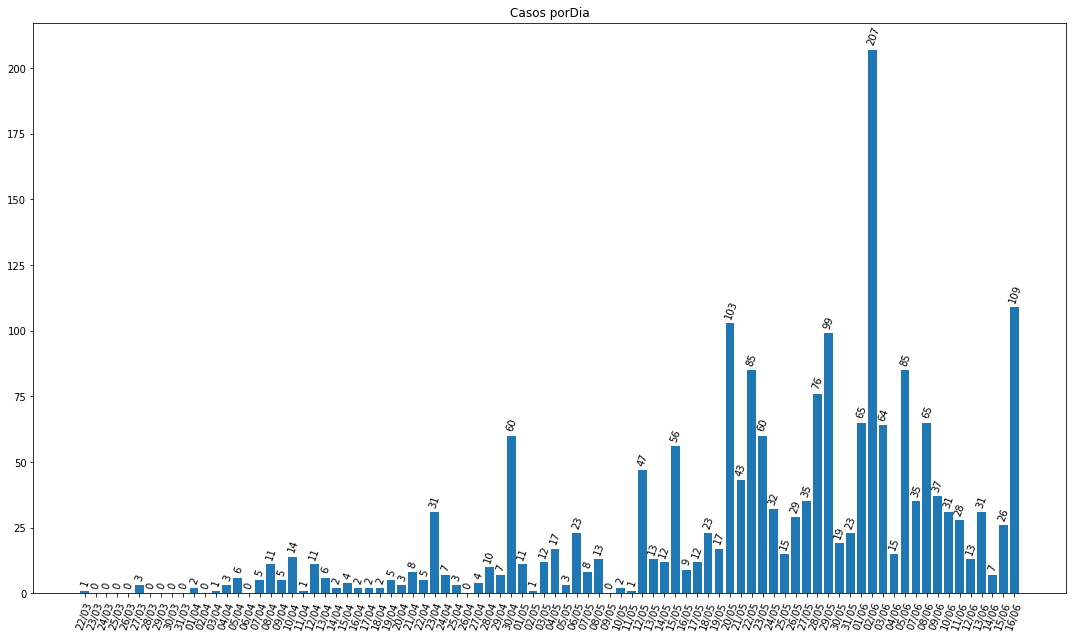

Dicionario:  comunidades

Id: 4 Tag: 

Id: 5 Tag: 

Id: 6 Tag: 

Id: 7 Tag: 

Id: 8 Tag: window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-164033848-2');


In [ ]:
# Set the URL you want to webscrape from
url = 'https://painel.vozdascomunidades.com.br' 

# Connect to the URL
response = requests.get(url)

print('If the access was successful: <Response [200]>')
print(response,'\n')

# Parse HTML and save to BeautifulSoup object
#soup = BeautifulSoup(response.text, "html.parser")
soup = BeautifulSoup(response.text, "lxml")

visualization = True
for id,tag in enumerate(soup.find_all("script", recursive=True)):
    
     print('\nId:',id,'Tag:',html2accent(tag.text.strip()))
     
     if 'porDia' in tag.text:
         for content in tag:
             name = content.name
             if isinstance(content, NavigableString):
                 s = html2accent(str(content))
                 s = s.replace("\n","")
                 s = s.replace("var ","")
                 s = s.replace("\\/","/")
                 s = s.replace('"24/03","25/04","26/03"','"24/03","25/03","26/03"') #Corrige bug date
                 values = s.strip().split(';')
                 values.remove('') #remove empty item
                 
                 for value in values:                     
                     var_name = value[:value.find('=')].strip()
                     print('Dicionario: ',var_name)
                     start = value.find('{')
                     end = value.find('}')
                     x = ast.literal_eval(value[start:end+1])
                     if "confirmados" in x:
                         x['confirmados'] = [int(i) for i in x['confirmados']]
                    
                     save_obj(x,var_name)   
                         
                     if visualization and var_name == 'porDia':
                         plt.xticks(rotation=70)
                         plt.bar(x['datas'], x['confirmados'], align='center')
                         plt.title('Casos '+var_name)

                         # Text on the top of each barplot
                         for i in range(len(x['datas'])):
                             if x['confirmados'][i] < 10:
                                 plt.text(x = i-0.5, y = x['confirmados'][i]+2, s = str(x['confirmados'][i]), rotation=70)
                             else:
                                 plt.text(x = i-0.6, y = x['confirmados'][i]+2, s = str(x['confirmados'][i]), rotation=70)
                            
                        
                         #plt.savefig("Casos_"+var_name+".png", dpi=100)
                         fig = plt.gcf()
                         fig.set_size_inches(18.5, 10.5)
                         plt.show()
                        #  fig.savefig("Casos_"+var_name+".png", dpi=100)
                         

#### Read dictionaries and convert to dataframe

In [ ]:
df_vozcom_final = pd.merge(pd.DataFrame(load_obj('porDia')),
                           pd.DataFrame(load_obj('acumulados')).rename(columns={'confirmados': 'confirmados_acum', 'obitos': 'obitos_acum'}),
                           on='datas')

In [ ]:
df_vozcom_final.head()

,datas,confirmados,confirmados_acum,obitos_acum
0,22/03,1,1,0
1,23/03,0,1,0
2,24/03,0,1,0
3,25/03,0,1,0
4,26/03,0,1,0


In [ ]:
'''
Analises das Comunidades
'''

comunidades_df = df_vozcom_final.iloc[:,0:2]
comunidades_df = comunidades_df.rename_axis('index').reset_index()

def gerarTreinamento_parametros_Comunidades(pais,version,n_entradas,n_saidas):
    #Parametros: (path_input,tipo_analise,pais)
    daily_cases = comunidades_df
    #Parametros: (dados_covid, n_dias_entrada, n_dias_saida) -- scaler - toback oringial data
    dados_covid, X,y, input_array, scaler = preparar_dados(daily_cases, n_entradas, n_saidas)
    
    ##Parametros: (modelo,n_dias_entrada, n_dias_saida)
    modelo = Sequential()
    modelo = definir_modelo_lstm_simples(modelo,n_entradas, n_saidas)
    
    #Parametros: (X,y,modelo,epocas,batch)
    history = treinamento(X,y,modelo,50,1)
    #cria dicionario
    history = history.history
    history.keys()
    
    #Salvando Dicionario
    salvardicionario("History_"+pais+"_"+version,history)
    salvarmodelo("Modelo_"+pais+"_"+version,modelo)


In [ ]:
'''
# =============================================================================
# COMUNIDADES DO RIO DE JANEIRO
# =============================================================================
'''

gerarTreinamento_parametros_Comunidades("Comunidades","v1",5,5)

Epoch 1/50
77/77 [==============================] - 4s 49ms/step - loss: 0.0247
Epoch 2/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0219
Epoch 3/50
77/77 [==============================] - 2s 21ms/step - loss: 0.0204
Epoch 4/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0200
Epoch 5/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0200
Epoch 6/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0195
Epoch 7/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0195
Epoch 8/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0195
Epoch 9/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0187
Epoch 10/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0190
Epoch 11/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0179
Epoch 12/50
77/77 [==============================] - 2s 22ms/step - loss: 0.0186
Epoch 13/50
77/77 [==================

In [87]:
def geraValidacao_Comunidades(pais,modelo,n_entrada,n_saida,comunidade):
    daily_cases = comunidade
    dados_covid, X,y, input_array, scaler = preparar_dados(daily_cases, n_entrada, n_saida)
    
    #Carrega modelo já Treinado
    modelo = carregaModelo(modelo)
    
    list_pred = []
    for i in range(0, 70, n_saida):
        input_array_test =  np.array(dados_covid[i:(i+n_entrada)])
        y_predict_val_test = predict(modelo,input_array_test,n_entrada)
        list_pred.append(y_predict_val_test)
    
    plt.figure()
    concatenado = np.concatenate((list_pred[:]))
    true = dados_covid[n_entrada:len(concatenado)+n_entrada]
#    print(len(true))
#    print(len(concatenado))
    if len(true) < len(concatenado):
        print("entrou condi")
        lim = (len(concatenado) - len(true))
        concatenado = concatenado[0:len(concatenado) - lim]
        
    score_rmse = math.sqrt(mean_squared_error(concatenado, true))
    plt.plot(concatenado,'r--', label = 'Predicted Values')
    plt.plot(true,'b',label = 'True Values')
    plt.xlabel('Days Since First Case')
    plt.ylabel('Daily Confirmed Cases')
    plt.legend(loc ='upper right')
    plt.title('Prediction Score: %.4f RMSE' % (score_rmse))
    
    print("Prediction Score [RMSE]: ", score_rmse)
    return score_rmse
    
'''
Validação Comunidades
'''
print("---------***-----Score Comuniadades ------***--------")
#modelo 1
#pontos de entrada
n_entrada = 5
#pontos de saida
n_saida = 5
#Parametros: (pais,modelo,n_entrada,n_saida,t,lim_pred,lim_true):
score_comunidade_1 = geraValidacao_Comunidades("Comunidades","Modelo_Comunidades_v1",n_entrada,n_saida,comunidades_df)


---------***-----Score Comuniadades ------***--------


NameError: ignored